In [1]:
import os
import torchaudio
import torch
from EgoExoEMS.EgoExoEMS import EgoExoEMSDataset, collate_fn, transform
import numpy as np
import warnings
warnings.filterwarnings("ignore", message="Accurate seek is not implemented for pyav backend")



In [4]:
root = "/standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng9/cardiac_arrest/1/GoPro/GX010346_encoded_trimmed.mp4"  # Folder in which all videos lie in a specific structure
annotation_file = "../../Annotations/main_annotation.json"  # A row for each video sample as: (VIDEO_PATH START_FRAME END_FRAME CLASS_ID)

# train_annotation_file = "../../Annotations/splits/keysteps/train_split.json"  # A row for each video sample as: (VIDEO_PATH START_FRAME END_FRAME CLASS_ID)
# val_annotation_file = "../../Annotations/splits/keysteps/val_split.json"  # A row for each video sample as: (VIDEO_PATH START_FRAME END_FRAME CLASS_ID)
# test_annotation_file = "../../Annotations/splits/keysteps/test_split.json"  # A row for each video sample as: (VIDEO_PATH START_FRAME END_FRAME CLASS_ID)

train_dataset = EgoExoEMSDataset(annotation_file=annotation_file,
                                data_base_path='',
                                fps=29.97, frames_per_clip=None, transform=transform, data_types=[ 'flow'])

# Access a sample
print(len(train_dataset))





[Warning] Skipping trial 0 for subject ms1 due to missing data
[Warning] Skipping trial 2 for subject ms1 due to missing data
[Warning] Skipping trial 2 for subject ms2 due to missing data
[Warning] Skipping trial 3 for subject ms2 due to missing data
[Warning] Skipping trial 4 for subject ms2 due to missing data
[Warning] Skipping trial 0 for subject ng1 due to missing data
[Warning] Skipping trial 0 for subject ng2 due to missing data
[Warning] Skipping trial 0 for subject ng3 due to missing data
[Warning] Skipping trial 10 for subject ng3 due to missing data
[Warning] Skipping trial 12 for subject ng3 due to missing data
[Warning] Skipping trial 2 for subject ng3 due to missing data
[Warning] Skipping trial 3 for subject ng3 due to missing data
[Warning] Skipping trial 4 for subject ng3 due to missing data
[Warning] Skipping trial 5 for subject ng3 due to missing data
[Warning] Skipping trial 8 for subject ng3 due to missing data
[Warning] Skipping trial 0 for subject ng5 due to mis

In [3]:
flow_path = '/standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/9/i3d_flow/GX010374_encoded_trimmed_flow.npy'
gopro_path = '/standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/9/GoPro/GX010374_encoded_trimmed.mp4'

# load the flow
flow = np.load(flow_path)
print(flow.shape)

import math

print((2724-2626))
print(math.ceil((2724-2626)/30))

(3371, 1024)
98
4


In [4]:
# import torchvision
# from torchvision.io import VideoReader
# import os
# import itertools

# start_t = 71.30542
# end_t = 72.993
# video_path = root
# # video_path = "/standard/UVA-DSA/NIST EMS Project Data/CognitiveEMS_Datasets/North_Garden/Sep_2024/Raw/24-09-2024/Bhavik/cardiac_arrest/4/GoPro/GX010399.MP4"  # Folder in which all videos lie in a specific structure
# video_reader = VideoReader(video_path, "video")
# frames = []


# for frame in itertools.takewhile(lambda x: x['pts'] <= end_t, video_reader.seek(start_t)):
#     if(frame['pts'] < start_t):
#         continue
#     print(frame['pts'])
#     img_tensor = transform(frame['data'])
#     frames.append(img_tensor)

# frames = torch.stack(frames)
# print("Seeking from ", start_t, " to ", end_t, "for video ", video_path)
# print("Frames shape: ", frames.shape)

In [5]:
# create a data loader
# batch size is 1 for simplicity and to ensure only a full clip related to a key step is given without collating.
# if batch size is greater than 1, collate_fn will be called to collate the data.
data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)
print(len(data_loader))

733


In [ ]:
# Iterate over the data loader and print the shape of the batch
for batch in data_loader:
    print(batch['frames'].shape, batch['audio'].shape, batch['flow'].shape, batch['rgb'].shape, batch['smartwatch'].shape, batch['depth_sensor'].shape , batch['keystep_label'], batch['keystep_id'], batch['start_frame'], batch['end_frame'],batch['start_t'], batch['end_t'],  batch['subject_id'], batch['trial_id'])
    print("*"*4 + "="*50 + "*"*4)
    
    # audio_tensor = batch['audio'][0]
    # #transpose
    # audio_tensor = audio_tensor.transpose(0,1)
    # torchaudio.save("./visualizations/audio.wav", audio_tensor,48000)
    # break   

Item index: 0, Clip index: 0
torch.Size([1, 170, 3, 224, 224]) torch.Size([1, 274432, 2]) torch.Size([1, 170, 1024]) torch.Size([1, 170, 1024]) torch.Size([1, 170, 3]) torch.Size([1, 170, 1]) ['approach_patient'] tensor([0]) tensor([0]) tensor([170]) tensor([0]) tensor([5.7044]) ['ms1'] ['1']
****==================================================****
Item index: 1, Clip index: 0
torch.Size([1, 69, 3, 224, 224]) torch.Size([1, 110592, 2]) torch.Size([1, 69, 1024]) torch.Size([1, 69, 1024]) torch.Size([1, 69, 3]) torch.Size([1, 69, 1]) ['check_responsiveness'] tensor([1]) tensor([170]) tensor([239]) tensor([5.7040]) tensor([7.9814]) ['ms1'] ['1']
****==================================================****
Item index: 2, Clip index: 0
torch.Size([1, 117, 3, 224, 224]) torch.Size([1, 188416, 2]) torch.Size([1, 117, 1024]) torch.Size([1, 117, 1024]) torch.Size([1, 117, 3]) torch.Size([1, 117, 1]) ['check_pulse'] tensor([2]) tensor([239]) tensor([356]) tensor([7.9810]) tensor([11.8981]) ['ms1

torch.Size([1, 170, 3, 224, 224]) torch.Size([1, 273408, 2]) torch.Size([1, 170, 1024]) torch.Size([1, 170, 1024]) torch.Size([1, 170, 3]) torch.Size([1, 170, 1]) ['ventilate_patient'] tensor([14]) tensor([1125]) tensor([1295]) tensor([37.5530]) tensor([43.2405]) ['ng5'] ['1']
torch.Size([15, 3, 224, 224]) torch.Size([15, 1024]) torch.Size([15, 1024]) torch.Size([15, 3]) torch.Size([15, 1])


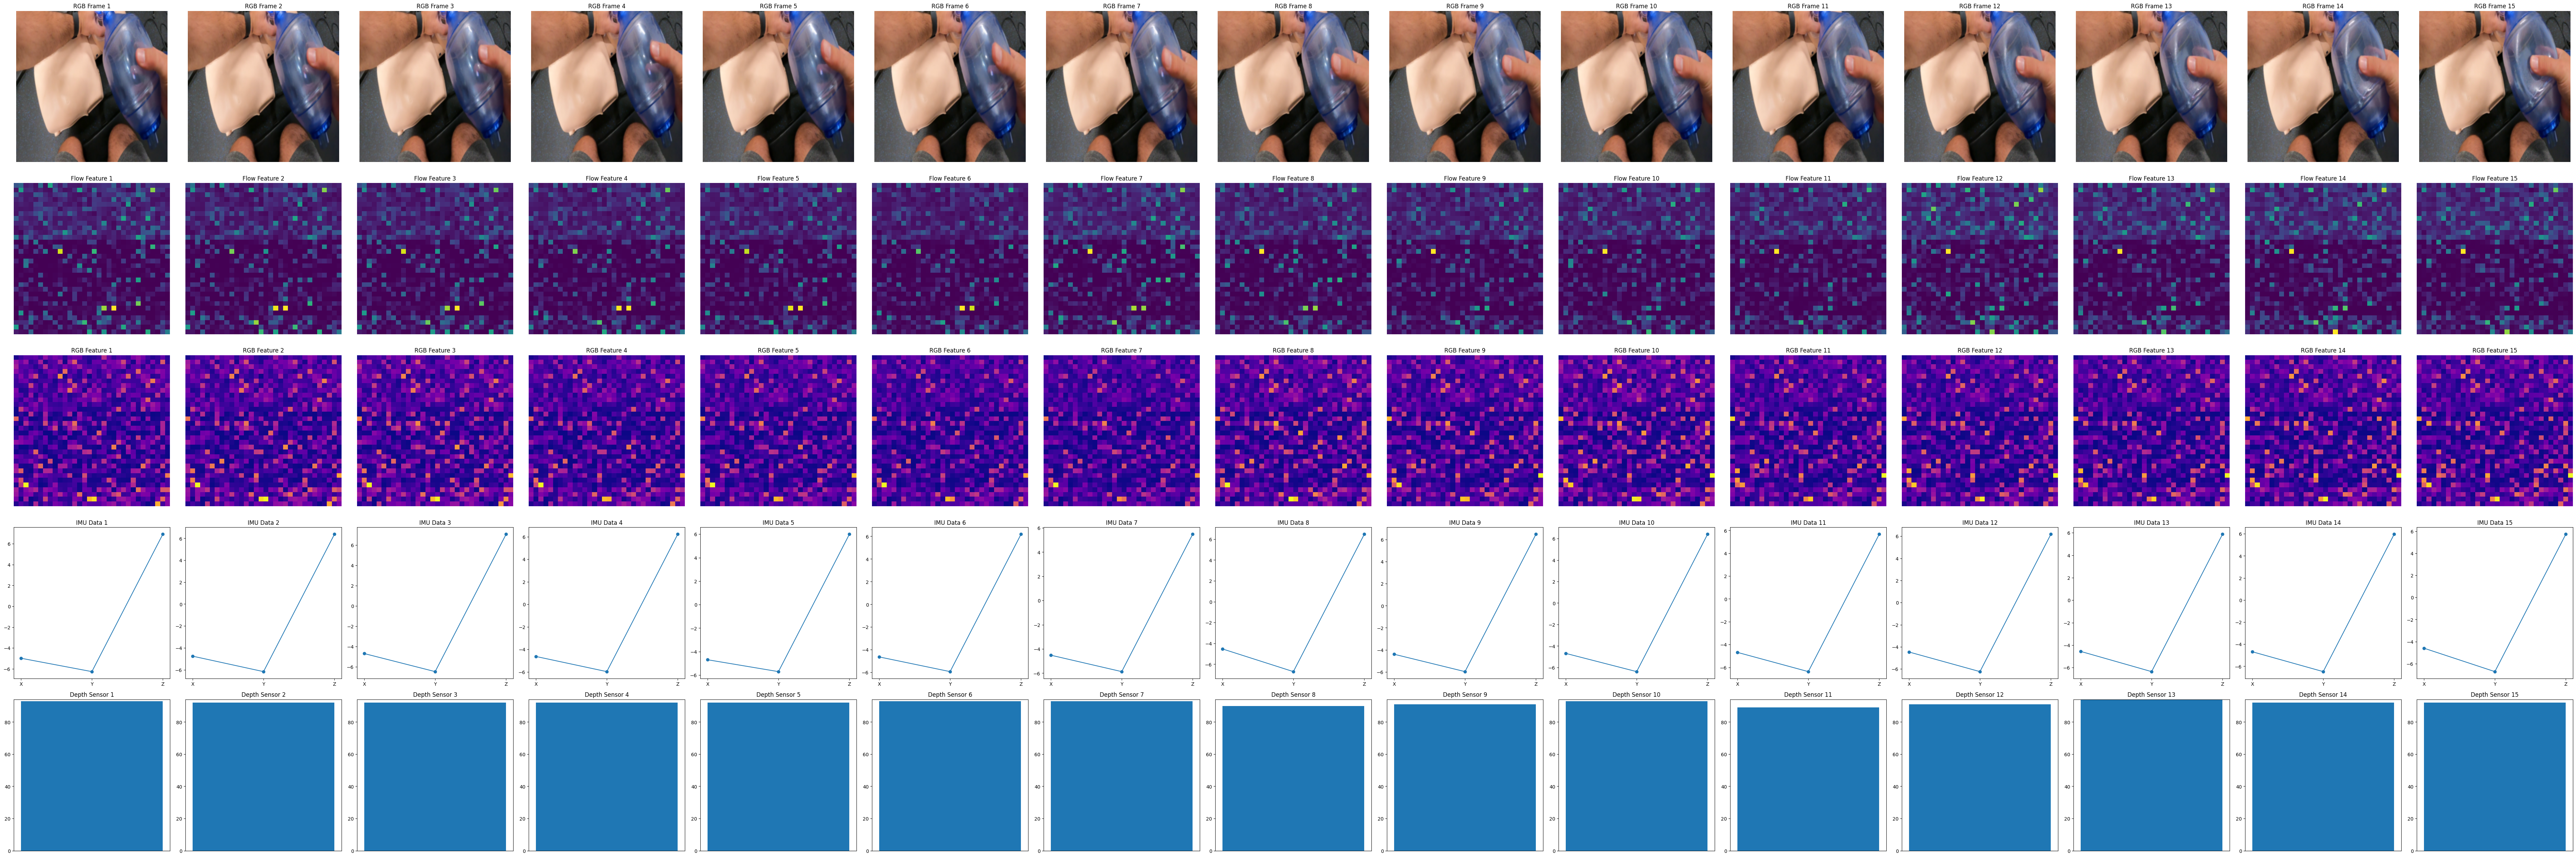

In [48]:
import matplotlib.pyplot as plt
import numpy as np

def plot_rgb_flow_imu_depth(rgb_frames, flow_frames, rgb_feature, imu_data, depth_data):
    # Assume rgb_frames is of shape (frames, height, width, 3) and flow_frames is (frames, 1024)
    # imu_data is of shape (frames, 3) and depth_data is (frames, 1)
    print(rgb_frames.shape, flow_frames.shape, rgb_feature.shape, imu_data.shape, depth_data.shape)
    num_frames = rgb_frames.shape[0]

    fig, axes = plt.subplots( 5, num_frames, figsize=(num_frames * 5, 25))

    for i in range(num_frames):
        rgb_image = rgb_frames[i].permute(1, 2, 0).cpu().numpy()
        
        # Plot RGB frame
        axes[0, i].imshow(rgb_image)
        axes[0, i].axis('off')
        axes[0, i].set_title(f"RGB Frame {i+1}")
        
        # Plot flow data as a heatmap for the corresponding frame
        axes[1, i].imshow(flow_frames[i].reshape(32, 32), cmap='viridis', aspect='auto')  # assuming 1024 is reshaped to 32x32
        axes[1, i].axis('off')
        axes[1, i].set_title(f"Flow Feature {i+1}")
        
        # Plot the RGB feature as a heatmap
        rgb_feature_image = rgb_feature[i].cpu().numpy().reshape(32, 32)  # Reshape to 32x32
        axes[2, i].imshow(rgb_feature_image, cmap='plasma', aspect='auto')
        axes[2, i].axis('off')
        axes[2, i].set_title(f"RGB Feature {i+1}")
        
        # Plot smartwatch IMU data (3-axis)
        # Plot smartwatch IMU data (3-axis: x, y, z)
        imu_time_series = imu_data[i].cpu().numpy()  # Shape (3,)
        axes[3, i].plot([0, 1, 2], imu_time_series, marker='o', label=['X', 'Y', 'Z'])
        axes[3, i].set_xticks([0, 1, 2])
        axes[3, i].set_xticklabels(['X', 'Y', 'Z'])
        axes[3, i].set_title(f"IMU Data {i+1}")
        
        # Plot depth sensor data
        depth_value = depth_data[i].cpu().numpy()
        axes[4, i].bar(0, depth_value, width=0.5)
        axes[4, i].set_ylim(0, np.max(depth_data.cpu().numpy()))  # Adjust y-axis based on max depth value
        axes[4, i].set_title(f"Depth Sensor {i+1}")
        axes[4, i].set_xticks([])  # No x-ticks since it's a single bar

        # Save each figure
        plt.savefig(f"./visualizations/frame_{i}.png")

    plt.tight_layout()
    plt.show()

# Example usage with your batch data
# batch = next(iter(data_loader))
print(batch['frames'].shape, batch['audio'].shape, batch['flow'].shape, batch['rgb'].shape, batch['smartwatch_imu'].shape, batch['depth_sensor'].shape , batch['keystep_label'], batch['keystep_id'], batch['start_frame'], batch['end_frame'],batch['start_t'], batch['end_t'],  batch['subject_id'], batch['trial_id'])
# torch.Size([1, 82, 3, 224, 224]) torch.Size([1, 133120, 2]) torch.Size([1, 1, 1024]) torch.Size([1, 1, 1024]) torch.Size([1, 82, 3]) torch.Size([1, 82, 1]) ['place_bvm'] tensor([13]) tensor([2416]) tensor([2498]) tensor([80.6273]) tensor([83.3773]) ['ng8'] ['7']

rgb_frames= batch['frames'][0]
flow_frames = batch['flow'][0]
rgb_feature = batch['rgb'][0]
imu_data = batch['smartwatch_imu'][0]
depth_data = batch['depth_sensor'][0]

plot_index = min(rgb_frames.shape[0], flow_frames.shape[0], rgb_feature.shape[0], imu_data.shape[0], depth_data.shape[0])

if(plot_index > 1):
    plot_index = 15
    plot_rgb_flow_imu_depth(rgb_frames[0:plot_index], flow_frames[0:plot_index], rgb_feature[0:plot_index],imu_data[0:plot_index], depth_data[0:plot_index])


In [28]:
! ffmpeg

ffmpeg version 4.3 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/opt/conda/conda-bld/ffmpeg_1597178665428/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeh --cc=/opt/conda/conda-bld/ffmpeg_1597178665428/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libavresample   4.  0.  0 /  4.  0.  0
  libsw

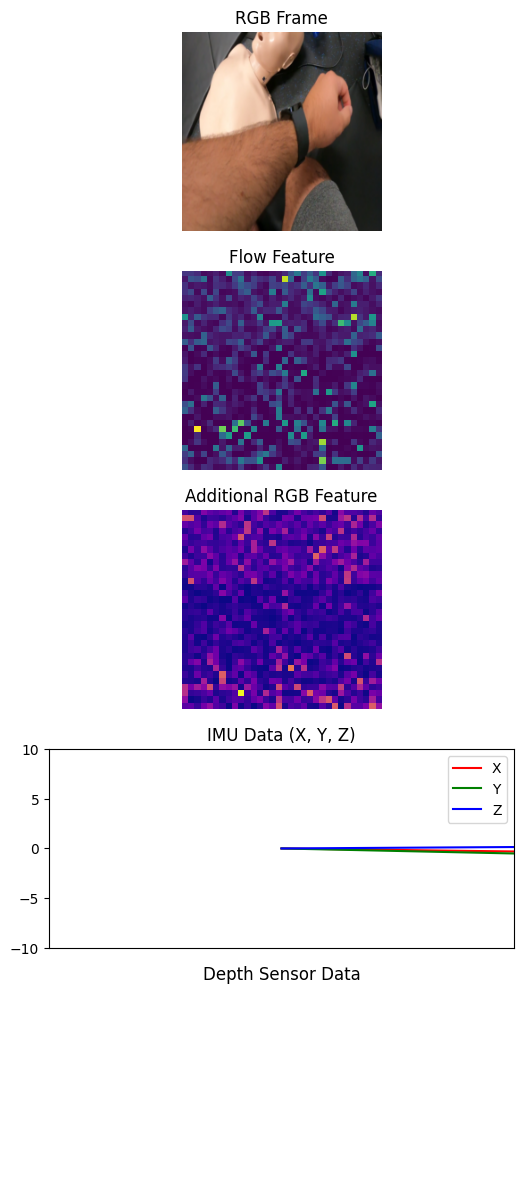

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

def animate_rgb_flow_imu_depth(rgb_frames, flow_frames, additional_rgb, imu_data, depth_data):
    num_frames = rgb_frames.shape[0]
    
    fig, axes = plt.subplots(5, 1, figsize=(6, 15))  # 5 rows for RGB, Flow, Additional RGB, IMU, and Depth

    # Initialize the images that will be updated
    rgb_im = axes[0].imshow(np.zeros((rgb_frames.shape[2], rgb_frames.shape[3], 3)))
    flow_im = axes[1].imshow(np.zeros((32, 32)), cmap='viridis')
    add_rgb_im = axes[2].imshow(np.zeros((32, 32)), cmap='plasma')
    
    # For IMU and Depth, we initialize placeholders
    imu_plot_x, = axes[3].plot([], [], 'r-', label='X')
    imu_plot_y, = axes[3].plot([], [], 'g-', label='Y')
    imu_plot_z, = axes[3].plot([], [], 'b-', label='Z')
    depth_plot = axes[4].bar([0], [0], width=0.5)  # Single bar for depth value

    axes[0].set_title('RGB Frame')
    axes[1].set_title('Flow Feature')
    axes[2].set_title('Additional RGB Feature')
    axes[3].set_title('IMU Data (X, Y, Z)')
    axes[4].set_title('Depth Sensor Data')
    
        # Set a fixed Y-axis range for IMU data
    imu_y_range = (-10, 10)  # Adjust this range based on your IMU data values
    axes[3].set_ylim(imu_y_range)  # Set a fixed range for the IMU Y-axis


    # Turn off axis for cleaner visuals
    for ax in axes:
        ax.axis('off') if ax != axes[3] else ax.set_xticks([])  # Don't turn off axis for IMU

    # IMU axis should show the three axes, so enable labels for this plot
    axes[3].legend(loc='upper right')

    def update(frame):
        # Update RGB data
        rgb_image = rgb_frames[frame].permute(1, 2, 0).cpu().numpy()
        rgb_im.set_data(rgb_image)
        
        # Update flow data
        flow_image = flow_frames[frame].cpu().numpy().reshape(32, 32)
        flow_im.set_data(flow_image)
        flow_im.set_clim(vmin=np.min(flow_image), vmax=np.max(flow_image))  # Set dynamic color range
        
        # Update additional RGB data
        additional_rgb_image = additional_rgb[frame].cpu().numpy().reshape(32, 32)
        add_rgb_im.set_data(additional_rgb_image)
        add_rgb_im.set_clim(vmin=np.min(additional_rgb_image), vmax=np.max(additional_rgb_image))  # Set dynamic color range
        
        # Update IMU data
        imu_values = imu_data[frame].cpu().numpy()  # shape (3,)
        imu_plot_x.set_data([0, 1], [0, imu_values[0]])  # X-axis value
        imu_plot_y.set_data([0, 1], [0, imu_values[1]])  # Y-axis value
        imu_plot_z.set_data([0, 1], [0, imu_values[2]])  # Z-axis value

        # Update depth sensor data
        depth_value = depth_data[frame].cpu().numpy().item()  # Assuming depth_data has shape (num_frames, 1)
        depth_plot[0].set_height(depth_value)
        depth_plot[0].set_y(depth_value)

        return [rgb_im, flow_im, add_rgb_im, imu_plot_x, imu_plot_y, imu_plot_z] + list(depth_plot)

    # Create animation
    ani = animation.FuncAnimation(fig, update, frames=num_frames, interval=200, blit=True)
    
    # Save as GIF using Pillow backend
    ani.save('./visualizations/animated_video_with_imu_depth.gif', writer='pillow', fps=30)
    
    plt.show()

plot_index = min(rgb_frames.shape[0], flow_frames.shape[0], rgb_feature.shape[0], imu_data.shape[0], depth_data.shape[0])

# Example usage with your batch data
animate_rgb_flow_imu_depth(rgb_frames[0:plot_index], flow_frames[0:plot_index], rgb_feature[0:plot_index], imu_data[0:plot_index], depth_data[0:plot_index])
